# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [19]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


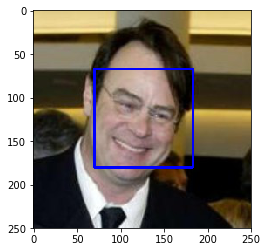

In [20]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [21]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

* The accuracy of the face detection is: 98.0 %
* The human faces found in dog images: 17.0 %

see code below:

In [22]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

faces_detected = []
for human in human_files_short:
    faces_detected.append(face_detector(human))

dogfaces_detected = []
for dog in dog_files_short:
    dogfaces_detected.append(face_detector(dog))

In [23]:
from sklearn.metrics import accuracy_score
y_true = [True] * 100  # so that I can use it in the accuracy score function
# y_false = [False] * 100
print('The accuracy of the face detection is: %.1f %%' % (accuracy_score(y_true, faces_detected)*100))
print('The human faces found in dog images: %.1f %%' % (accuracy_score(y_true, dogfaces_detected)*100))

The accuracy of the face detection is: 98.0 %
The human faces found in dog images: 17.0 %


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [24]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

cat_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalcatface.xml')
def cat_detector(img_path):
    """returns "True" if cat is detected in image stored at img_path."""
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cats = cat_cascade.detectMultiScale(gray)
    return len(cats) > 0

catfaces_detected = []
for human in human_files_short:
    catfaces_detected.append(cat_detector(human))

catdogs_detected = []
for dog in dog_files_short:
    catdogs_detected.append(cat_detector(dog))
    
print('The cats found in human images: %.1f %%' % (accuracy_score(y_true, catfaces_detected)*100))
print('The cats found in dog   images: %.1f %%' % (accuracy_score(y_true, catdogs_detected)*100))

The cats found in human images: 12.0 %
The cats found in dog   images: 13.0 %


---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [25]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [26]:
from PIL import Image
import torchvision.transforms as T
# import torchvision.models as models

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    # vgg16 = models.vgg16(pretrained=True), already done in cell above
    
    # All pre-trained models expect input images normalized in the same way,
    # i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where 
    # H and W are expected to be at least 224. The images have to be loaded 
    # in to a range of [0, 1] and then normalized using mean = [0.485, 0.456, 0.406] 
    # and std = [0.229, 0.224, 0.225]. You can use the following transform 
    # to normalize
    normalize = T.Normalize(mean=[0.485, 0.456, 0.406],
                            std=[0.229, 0.224, 0.225])
    
    # The process for obtaining the values of mean and std is roughly equivalent to:
    transform = T.Compose([T.Resize(256), T.CenterCrop(224), T.ToTensor(), normalize])
        
    # load color (BGR) image
    img = Image.open(img_path)
    
    # https://knowledge.udacity.com/questions/362645
    img = transform(img).unsqueeze_(0)
    if use_cuda:
        img = img.cuda()
    
    VGG16.eval() # to put in eval mode as we are only doing inference
    output = torch.argmax(VGG16(img))
    
    return output # predicted class index

In [27]:
# a = VGG16_predict(dog_files_short[1])

In [28]:
# a == 257

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [29]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    predict_tensor = VGG16_predict(img_path)
    is_dog = (predict_tensor >= 151) & (predict_tensor <= 268)
    return bool(is_dog) # true/false



### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

* The dog detector found no dogs in the human images,
* and at least one dog in each dog file.

see code below:

In [30]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

dogfaces_detected = []
for human in human_files_short:
    dogfaces_detected.append(dog_detector(human))

dogs_detected = []
for dog in dog_files_short:
    dogs_detected.append(dog_detector(dog))


In [31]:
print('Dogs found in human images: %.1f %%' %  (accuracy_score(y_true, dogfaces_detected) * 100))
print('Dogs found in dog   images: %.1f %%' %  (accuracy_score(y_true, dogs_detected) * 100))


Dogs found in human images: 0.0 %
Dogs found in dog   images: 100.0 %


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [32]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [33]:
# How many images are there?
#!find /data/dog_images/valid -type f | wc -l  # 835
#!find /data/dog_images/train -type f | wc -l  # 6680
#!find /data/dog_images/test -type f | wc -l  # 836

# How many classes are there?
# !ls /data/dog_images/train  # 133

In [34]:
import os
import torch
from torchvision import datasets
import torchvision.transforms as transforms

# https://classroom.udacity.com/nanodegrees/nd009-ent/parts/a73e944a-fdd9-4469-9c67-a618aab59b18/modules/7862c5aa-2097-4dfa-9776-cbfe245d7b83/lessons/807590ea-abd5-4581-b91d-9eede9a0aad2/concepts/8f5cfe14-6076-4256-ae67-3ee53b3fdcc3

### TODO: Write data loaders for training, validation, and test sets
BATCH_SIZE = 20  # was a takeover from course material. Tried 40, but crashed. 

NUM_WORKERS= 2   # Two GPU's is likely max, 4 crashed, didn't try 3

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],  # documentation values:
                                 std=[0.229, 0.224, 0.225])   # https://pytorch.org/docs/stable/torchvision/transforms.html

training_transform = transforms.Compose([transforms.RandomResizedCrop(256),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.ToTensor(),
                                     normalize])

validation_transform = transforms.Compose([transforms.Resize(300),
                                     transforms.CenterCrop(256),
                                     transforms.ToTensor(),
                                     normalize])

test_transform = transforms.Compose([transforms.Resize(size=(256,256)),
                                     transforms.ToTensor(),
                                     normalize])

train_data = datasets.ImageFolder('/data/dog_images/train/', training_transform)
valid_data = datasets.ImageFolder('/data/dog_images/valid/', validation_transform)
test_data = datasets.ImageFolder('/data/dog_images/test/', test_transform)

train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
valid_loader = torch.utils.data.DataLoader(
    valid_data, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)
test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)




**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
* Overall I chose an image size of 256, because it is a power of 2 and therefore leaves room for pooling.
* Chose a batch size of 20 as a takeover from the course material. Tried 40, but it crashed. So the hole model times 40 seems to be too much.
* Chose two GPU threads, because that's how much the workspace has.
* For the training dataset I choose to flip and random resize crop the images to provide a higher variety of images. This [blog post](https://medium.com/ymedialabs-innovation/data-augmentation-techniques-in-cnn-using-tensorflow-371ae43d5be9) shows some variety of possible transfers.
* For the validation dataset center crop and resize
* For the test set only resize

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [35]:
import torch.nn as nn
import torch.nn.functional as F

# check if CUDA is available
use_cuda = torch.cuda.is_available()

#a = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
#a

In [36]:
# define the CNN architecture
# source: https://github.com/udacity/deep-learning-v2-pytorch/blob/master/convolutional-neural-networks/cifar-cnn/cifar10_cnn_solution.ipynb
# I started with the working example of the CIFAR 10 dataset

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # convolutional layer (sees 256x256x3 image tensor)
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        
        # convolutional layer (sees 128x128x3 tensor)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        
        # convolutional layer (sees 64x64x3 tensor)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        
        
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        
        self.lastCNNsize = 32**2 * 64
        # linear layer, flatten output of CNN
        self.fc1 = nn.Linear(self.lastCNNsize, 500)  # flatten to 500x1
        
        # linear layer (500 -> 133) transform 500x1 to 133x1 different dog breeds
        self.fc2 = nn.Linear(500, 133)  
        
        # dropout layer (p=0.25), same as in CIFAR example
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = F.relu(self.conv1(x))   # gets a 256 image
        x = self.pool(x)            # maxpool down to 128
        x = F.relu(self.conv2(x))   # gets a 128 image
        x = self.pool(x)            # maxpool down to 64
        x = F.relu(self.conv3(x))   # gets a 64 image
        x = self.pool(x)            # maxpool down to 32
        
        # flatten image input
        x = x.view(-1, self.lastCNNsize) 
        
        # add dropout layer
        x = self.dropout(x)
        
        # add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        
        # add dropout layer
        x = self.dropout(x)
        x = self.fc2(x) # transform to labels 133x1
        
        return x
    

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

* I started with the CIFAR example from the udacity course material linked in the cell above.
* As a start I first created a model with one convolutional layer expanding the 3 color dimensions to 16 filters. Added a max pooling of (2,2) and therefore ended up with 128^2*16 features. After that a flattening and a dropout layer, just as in the example. The first training with 3 Epochs lead to a success rate of 3% wich already is better than guessing.
* After that I iterated my way up to three convolutional layers, everey time doubling the amount of filters and halfing the image dimension with a maxpool.
* The upper network reaches the 10% accuracy with about 15 epochs of training.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [37]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr = 0.05)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [38]:
# there was an error with some image:
# https://stackoverflow.com/questions/12984426/python-pil-ioerror-image-file-truncated-with-big-images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


import numpy as np

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
                        ## find the loss and update the model parameters accordingly
            
            ## Help from Mentor: https://knowledge.udacity.com/questions/494705
            ## record the average training loss, using something like
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            if batch_idx % 100 == 0:
                print('Epoch %d, Batch %d loss: %.6f' %
                  (epoch, batch_idx + 1, train_loss))
                
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            ## Help from Mentor: https://knowledge.udacity.com/questions/494705
            output = model(data)
            loss = criterion(output, target)
            ## update the average validation loss
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            torch.save(model.state_dict(), save_path)
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            valid_loss_min = valid_loss
    # return trained model
    return model



In [39]:
loaders_scratch = {
    'train': train_loader,
    'valid': valid_loader,
    'test': test_loader
}

# train the model
model_scratch = train(15, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch 1, Batch 1 loss: 4.910692
Epoch 1, Batch 101 loss: 4.887433
Epoch 1, Batch 201 loss: 4.869777
Epoch 1, Batch 301 loss: 4.842636
Epoch: 1 	Training Loss: 4.836531 	Validation Loss: 4.641121
Validation loss decreased (inf --> 4.641121).  Saving model ...
Epoch 2, Batch 1 loss: 4.645339
Epoch 2, Batch 101 loss: 4.679828
Epoch 2, Batch 201 loss: 4.667519
Epoch 2, Batch 301 loss: 4.655992
Epoch: 2 	Training Loss: 4.651346 	Validation Loss: 4.502292
Validation loss decreased (4.641121 --> 4.502292).  Saving model ...
Epoch 3, Batch 1 loss: 4.481124
Epoch 3, Batch 101 loss: 4.591025
Epoch 3, Batch 201 loss: 4.586783
Epoch 3, Batch 301 loss: 4.580087
Epoch: 3 	Training Loss: 4.577378 	Validation Loss: 4.446688
Validation loss decreased (4.502292 --> 4.446688).  Saving model ...
Epoch 4, Batch 1 loss: 4.684157
Epoch 4, Batch 101 loss: 4.542893
Epoch 4, Batch 201 loss: 4.532398
Epoch 4, Batch 301 loss: 4.517288
Epoch: 4 	Training Loss: 4.518498 	Validation Loss: 4.342647
Validation loss de

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [40]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.964051


Test Accuracy: 10% (88/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [41]:
## TODO: Specify data loaders

# The VGG16 model requires 224 image input size, therefore I recreated the loaders:

training_transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.ToTensor(),
                                     normalize])

validation_transform = transforms.Compose([transforms.Resize(256),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     normalize])

test_transform = transforms.Compose([transforms.Resize(size=(224,224)),
                                     transforms.ToTensor(),
                                     normalize])

train_data = datasets.ImageFolder('/data/dog_images/train/', training_transform)
valid_data = datasets.ImageFolder('/data/dog_images/valid/', validation_transform)
test_data = datasets.ImageFolder('/data/dog_images/test/', test_transform)

train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
valid_loader = torch.utils.data.DataLoader(
    valid_data, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)
test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)


loaders_transfer = {
    'train': train_loader,
    'valid': valid_loader,
    'test': test_loader
}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [42]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 

# https://github.com/udacity/deep-learning-v2-pytorch/blob/master/transfer-learning/Transfer_Learning_Solution.ipynb

model_transfer = models.vgg16(pretrained=True)

# Freeze training for all "features" layers
for param in model_transfer.features.parameters():
    param.requires_grad = False

model_transfer.classifier[6] =  nn.Linear(4096, 133) # from the flower exercise I knew there are 4096 input nodes in the second to last layer

if use_cuda:
    model_transfer = model_transfer.cuda()

In [43]:
model_transfer.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace)
  (2): Dropout(p=0.5)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace)
  (5): Dropout(p=0.5)
  (6): Linear(in_features=4096, out_features=133, bias=True)
)

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

* I started with the udacity lesson on flower classification linked above
* Change the size of the input images to 224, because thats the VGG16 size
* Set the requres_grad to *False*. That causes, that the already defined and trained layers of the pretrained vgg16 model do not require new gradiens during the training of the model. They will therefore not be altered in the training process.
* Replace the last feature layer from a 1000 classes ouput to 133, as available dog lables.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [44]:
import torch.optim as optim

# like suggested in:  https://classroom.udacity.com/nanodegrees/nd009-ent/parts/a73e944a-fdd9-4469-9c67-a618aab59b18/modules/7862c5aa-2097-4dfa-9776-cbfe245d7b83/lessons/807590ea-abd5-4581-b91d-9eede9a0aad2/concepts/dc4ca280-5465-412e-959d-2cf94298cfc7
# Cross entropy loss and gradient decent
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr = 0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [45]:
# train the model
model_transfer = train(10, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch 1, Batch 1 loss: 5.109932
Epoch 1, Batch 101 loss: 4.808494
Epoch 1, Batch 201 loss: 4.522730
Epoch 1, Batch 301 loss: 4.256063
Epoch: 1 	Training Loss: 4.168565 	Validation Loss: 2.722621
Validation loss decreased (inf --> 2.722621).  Saving model ...
Epoch 2, Batch 1 loss: 3.444200
Epoch 2, Batch 101 loss: 2.929039
Epoch 2, Batch 201 loss: 2.722607
Epoch 2, Batch 301 loss: 2.544827
Epoch: 2 	Training Loss: 2.496369 	Validation Loss: 1.188887
Validation loss decreased (2.722621 --> 1.188887).  Saving model ...
Epoch 3, Batch 1 loss: 1.899787
Epoch 3, Batch 101 loss: 1.808208
Epoch 3, Batch 201 loss: 1.743885
Epoch 3, Batch 301 loss: 1.690074
Epoch: 3 	Training Loss: 1.681564 	Validation Loss: 0.729846
Validation loss decreased (1.188887 --> 0.729846).  Saving model ...
Epoch 4, Batch 1 loss: 1.807826
Epoch 4, Batch 101 loss: 1.430690
Epoch 4, Batch 201 loss: 1.405866
Epoch 4, Batch 301 loss: 1.376418
Epoch: 4 	Training Loss: 1.367165 	Validation Loss: 0.580400
Validation loss de

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [46]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.479318


Test Accuracy: 84% (705/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [49]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in loaders_transfer['train'].dataset.classes]
model_transfer.eval()
def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    image = Image.open(img_path).convert('RGB')
    image_transformed = test_transform(image)[:3,:,:].unsqueeze(0)

    predictions = model_transfer.cpu()(image_transformed)
    prediction = torch.argmax(predictions)
    return class_names[prediction]



In [50]:
from pathlib import Path

paths = Path('./images').glob('*.*')
for img_file in paths:
    # print(img_file)
    print('The predicted breed for %s is:\n\t%s' % (img_file, predict_breed_transfer(img_file)))

The predicted breed for images/Welsh_springer_spaniel_08203.jpg is:
	Welsh springer spaniel
The predicted breed for images/Brittany_02625.jpg is:
	Brittany
The predicted breed for images/sample_cnn.jpg is:
	German wirehaired pointer
The predicted breed for images/Labrador_retriever_06449.jpg is:
	Labrador retriever
The predicted breed for images/Curly-coated_retriever_03896.jpg is:
	Curly-coated retriever
The predicted breed for images/sample_cnn.png is:
	German wirehaired pointer
The predicted breed for images/Labrador_retriever_06455.jpg is:
	Labrador retriever
The predicted breed for images/Labrador_retriever_06457.jpg is:
	Labrador retriever
The predicted breed for images/sample_dog_output.jpg is:
	Greyhound
The predicted breed for images/sample_dog_output.png is:
	Greyhound
The predicted breed for images/sample_human_output.png is:
	Cocker spaniel
The predicted breed for images/sample_human_output.jpg is:
	Dachshund
The predicted breed for images/American_water_spaniel_00648.jpg i

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [51]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
%matplotlib inline


def run_app(img_path):
    ## handle cases for a human face, dog, and neither# get bounding box for each detected face
    # convert BGR image to RGB for plotting
    
    # the following thew lines are from the example at the beginning:
    
    # extract pre-trained face detector
    face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')
    
    # load color (BGR) image
    img = cv2.imread(img_path)
    
    # convert BGR image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # find faces in image
    faces = face_cascade.detectMultiScale(gray)

    # get bounding box for each detected face
    for (x,y,w,h) in faces:
        # add bounding box to color image
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # display the image, along with bounding box
    
    plt.imshow(cv_rgb)
    plt.show()
    
    prediction = predict_breed_transfer(img_path)
    if len(faces) > 0:
        print("I think you are a human, but if you where a dog you'd be a: %s" % (prediction))
    elif dog_detector(img_path):
        print('You are most likely a dog of the breed: %s' % (prediction))
    else:
        print('I think you are neigher a dog, nor a human.')
        
    print('\n\n')

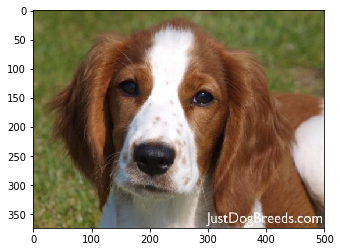

You are most likely a dog of the breed: Welsh springer spaniel





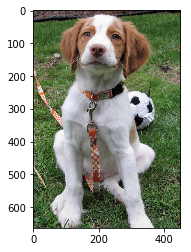

You are most likely a dog of the breed: Brittany





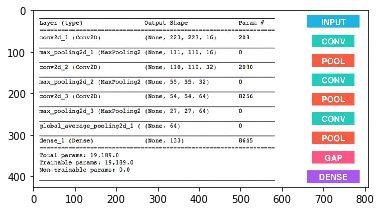

I think you are neigher a dog, nor a human.





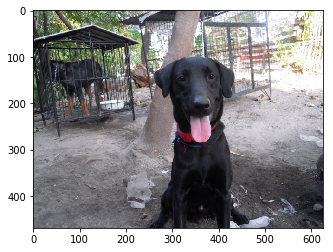

You are most likely a dog of the breed: Labrador retriever





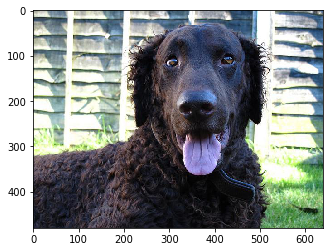

You are most likely a dog of the breed: Curly-coated retriever





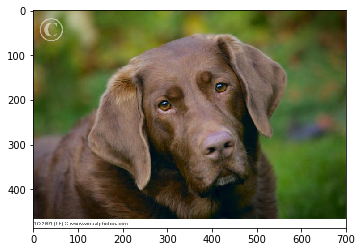

You are most likely a dog of the breed: Labrador retriever





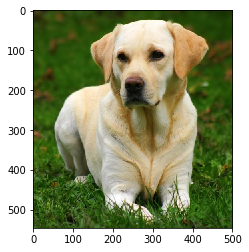

You are most likely a dog of the breed: Labrador retriever





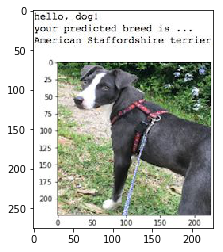

You are most likely a dog of the breed: Greyhound





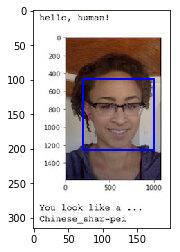

I think you are a human, but if you where a dog you'd be a: Dachshund





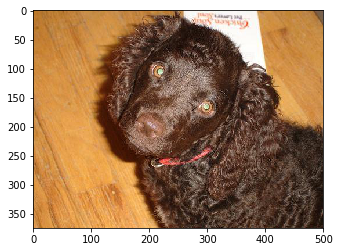

You are most likely a dog of the breed: Curly-coated retriever





In [52]:
paths = Path('./images').glob('*.jpg')
for img_file in paths:
    run_app(img_file.__str__())

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

Both models performed way better than I expected, I am a little proud that I was able to learn to create and adapt these models.

*Room for Improvement*

* More Images for Training
* Different augmentations, for example rotation.
* Maybe a capsule network to devide the dogs into legs, body, head
* Weight Initialization


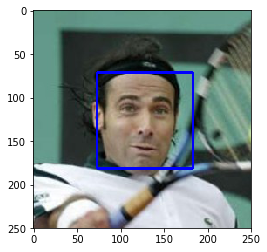

I think you are a human, but if you where a dog you'd be a: Ibizan hound





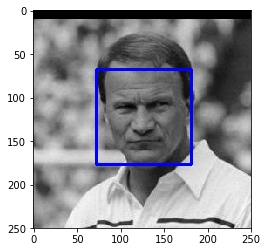

I think you are a human, but if you where a dog you'd be a: Ibizan hound





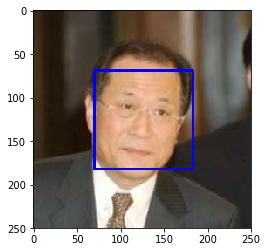

I think you are a human, but if you where a dog you'd be a: Brittany





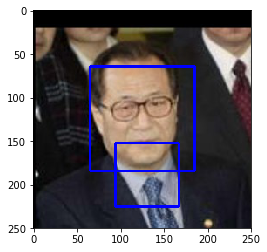

I think you are a human, but if you where a dog you'd be a: Brittany





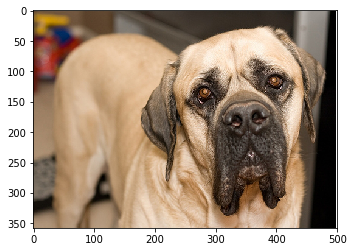

You are most likely a dog of the breed: Mastiff





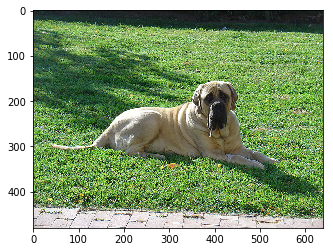

You are most likely a dog of the breed: Mastiff





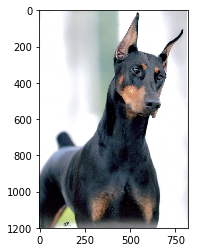

You are most likely a dog of the breed: German pinscher





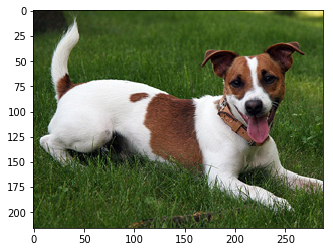

You are most likely a dog of the breed: Parson russell terrier





In [53]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[[1, 4, 6, 8]], dog_files[[5, 23, 100, 600]])):
    run_app(file)